In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [10]:
def get_feature_type(family):
    f = family.lower()
    if f.startswith("tfidf"):
        return "tfidf"
    elif f.startswith("fasttext"):
        return "fasttext"
    elif f.startswith("wfe"):
        return "wfe"
    elif f.startswith("wefe"):
        return "wefe"
    elif f.startswith("fe"):
        return "fe"
    elif f.startswith("we"):
        return "we"
    else:
        return "other"  # just in case

FEATURES = ["tfidf", "fasttext", "we", "wfe", "wefe", "fe"]
latex_labels = {
    "fasttext": r"$\mathcal{R}_{\mathrm{FT}}$",
    "we": r"$\mathcal{R}_{\mathrm{S}}$",
    "wefe": r"$\mathcal{R}_{\mathrm{H}}$",
    "wfe": r"$\mathcal{R}_{\mathrm{D}}$",
    "fe": r"$\mathcal{R}_{\mathrm{LLM}}$"
}

# CLUSTERING PLOTS

## JETSON

### CLUSTERING

In [3]:
clst_data = pd.read_csv("./generated/jetson/clustering/all_lang.csv")

In [4]:
clst_data['FeatureType'] = clst_data['FeatureFamily'].apply(get_feature_type)

In [5]:
clst_data['EDP'] = clst_data['time_per_sample'] * clst_data['energy_per_sample']

In [7]:
clst_data['FeatureType'].value_counts()

FeatureType
wefe        300
we          300
wfe         120
fe          120
fasttext     50
tfidf        50
Name: count, dtype: int64

In [8]:
clst_data.head()

,FeatureFamily,FeatureVariant,Dataset,Model,TrainingTime,train_silhouette_score,train_calinski_harabasz_score,train_davies_bouldin_score,train_adjusted_rand_score,train_normalized_mutual_info_score,...,train_completeness_score,train_f1_score,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,KMeans,48.212312,-0.003701,706.682208,5.251362,0.425568,0.511626,...,0.498213,0.650867,700,390.285105,0.000760,1.793561,0.557550,0.000001,tfidf,6.051911e-07
1,tfidf,300,arabic,KMeans++,11.729101,-0.011678,935.160645,5.111794,0.379996,0.518849,...,0.600845,0.525630,700,388.556077,0.000755,1.801542,0.555080,0.000001,tfidf,5.986142e-07
2,tfidf,512,arabic,KMeans,51.205691,0.000245,759.841039,5.425673,0.393371,0.558513,...,0.615818,0.572897,700,385.985554,0.000750,1.813539,0.551408,0.000001,tfidf,5.911397e-07
3,tfidf,512,arabic,KMeans++,37.459496,0.002386,691.642021,5.609716,0.484842,0.591877,...,0.605402,0.692005,700,385.078305,0.000749,1.817812,0.550112,0.000001,tfidf,5.885487e-07
4,tfidf,768,arabic,KMeans,67.764332,-0.012078,374.303818,5.641173,0.501388,0.629774,...,0.551349,0.640372,700,385.868418,0.000750,1.814090,0.551241,0.000001,tfidf,5.904531e-07


In [9]:
clst_data.FeatureFamily.value_counts()Mu

FeatureFamily
tfidf            50
fasttext         50
WE-XLM-R-T       50
WE-mBERT-T       50
WE-XGLM-T        50
WE-MPNet-S       50
WE-BGE-M3-S      50
WE-mE5-S         50
WEFE-MPNet-S     50
WEFE-XGLM-T      50
WEFE-XLM-R-T     50
WEFE-mBERT-T     50
WEFE-mE5-S       50
WEFE-BGE-M3-S    50
WFE-mBERT-T      20
WFE-XLM-R-T      20
WFE-XGLM-T       20
WFE-MPNet-S      20
FE-MPNet-S       20
FE-XGLM-T        20
FE-mBERT-T       20
FE-XLM-R-T       20
WFE-mE5-S        20
WFE-BGE-M3-S     20
FE-BGE-M3-S      20
FE-mE5-S         20
Name: count, dtype: int64

In [234]:
clst_data.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'Model', 'TrainingTime',
       'train_silhouette_score', 'train_calinski_harabasz_score',
       'train_davies_bouldin_score', 'train_adjusted_rand_score',
       'train_normalized_mutual_info_score', 'train_v_measure_score',
       'train_homogeneity_score', 'train_completeness_score', 'train_f1_score',
       'data_pts', 'time_sec', 'energy_kwh', 'throughput', 'time_per_sample',
       'energy_per_sample', 'FeatureType'],
      dtype='object')

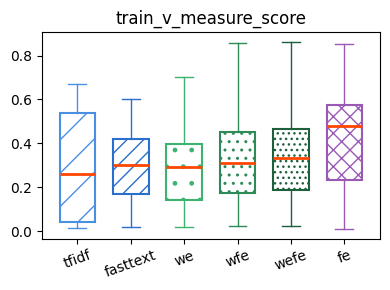

In [233]:
PLOT_TARGET = "train_v_measure_score"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


In [11]:
PLOT_TARGET = "throughput"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))
    
# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


KeyError: 'tfidf'

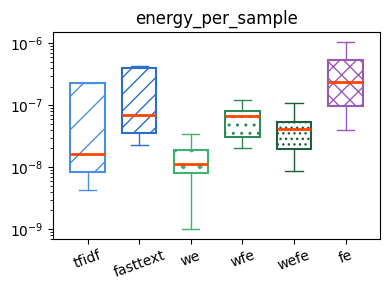

In [242]:
PLOT_TARGET = "energy_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


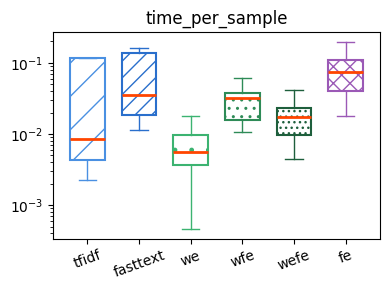

In [243]:
PLOT_TARGET = "time_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


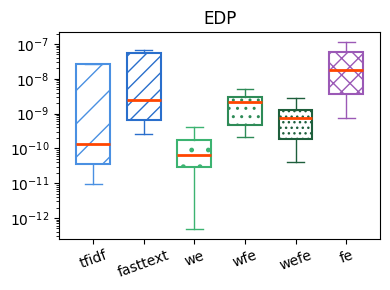

In [245]:
PLOT_TARGET = "EDP"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


##### WFE ABLATION -- FOR SELECTING mmm over mean

In [246]:
tmp_data = clst_data[clst_data.FeatureType == 'wfe']

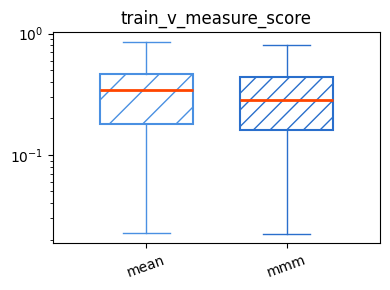

In [250]:
agg_type = ["mean", "mmm"]
PLOT_TARGET = "train_v_measure_score"

PLOT_DATA = defaultdict(list)
for agg in agg_type:
    PLOT_DATA[agg].append(tmp_data[tmp_data["FeatureVariant"]==agg][PLOT_TARGET])
    
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


## LAPTOP

### CLUSTERING

In [251]:
clst_data = pd.read_csv("./generated/laptop/clustering/all_lang.csv")

In [252]:
clst_data['FeatureType'] = clst_data['FeatureFamily'].apply(get_feature_type)

In [253]:
clst_data['EDP'] = clst_data['time_per_sample'] * clst_data['energy_per_sample']

In [254]:
clst_data['FeatureType'].value_counts()

FeatureType
we          400
wefe        400
wfe         160
fe          160
tfidf        50
fasttext     50
Name: count, dtype: int64

In [255]:
clst_data.head()

,FeatureFamily,FeatureVariant,Dataset,Model,TrainingTime,train_silhouette_score,train_calinski_harabasz_score,train_davies_bouldin_score,train_adjusted_rand_score,train_normalized_mutual_info_score,...,train_completeness_score,train_f1_score,data_pts,time_sec,energy_kwh,throughput,time_per_sample,energy_per_sample,FeatureType,EDP
0,tfidf,300,arabic,KMeans,48.212312,-0.003701,706.682208,5.251362,0.425568,0.511626,...,0.498213,0.650867,1400,153.808914,0.001488,9.102203,0.109864,0.000001,tfidf,1.167958e-07
1,tfidf,300,arabic,KMeans++,11.729101,-0.011678,935.160645,5.111794,0.379996,0.518849,...,0.600845,0.525630,1400,154.091071,0.001507,9.085536,0.110065,0.000001,tfidf,1.185049e-07
2,tfidf,512,arabic,KMeans,51.205691,0.000245,759.841039,5.425673,0.393371,0.558513,...,0.615818,0.572897,1400,154.785941,0.001513,9.044749,0.110561,0.000001,tfidf,1.194702e-07
3,tfidf,512,arabic,KMeans++,37.459496,0.002386,691.642021,5.609716,0.484842,0.591877,...,0.605402,0.692005,1400,154.385720,0.001514,9.068196,0.110276,0.000001,tfidf,1.192796e-07
4,tfidf,768,arabic,KMeans,67.764332,-0.012078,374.303818,5.641173,0.501388,0.629774,...,0.551349,0.640372,1400,154.521174,0.001509,9.060247,0.110372,0.000001,tfidf,1.189297e-07


In [256]:
clst_data.columns

Index(['FeatureFamily', 'FeatureVariant', 'Dataset', 'Model', 'TrainingTime',
       'train_silhouette_score', 'train_calinski_harabasz_score',
       'train_davies_bouldin_score', 'train_adjusted_rand_score',
       'train_normalized_mutual_info_score', 'train_v_measure_score',
       'train_homogeneity_score', 'train_completeness_score', 'train_f1_score',
       'data_pts', 'time_sec', 'energy_kwh', 'throughput', 'time_per_sample',
       'energy_per_sample', 'FeatureType', 'EDP'],
      dtype='object')

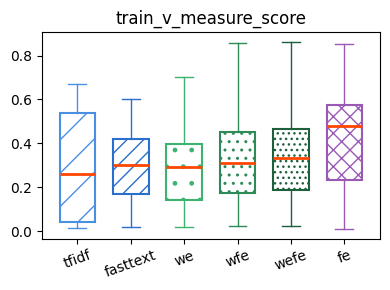

In [257]:
PLOT_TARGET = "train_v_measure_score"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


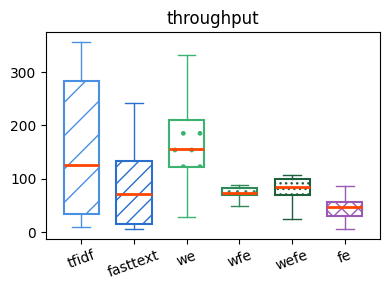

In [258]:
PLOT_TARGET = "throughput"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)

plt.tight_layout()
plt.show()


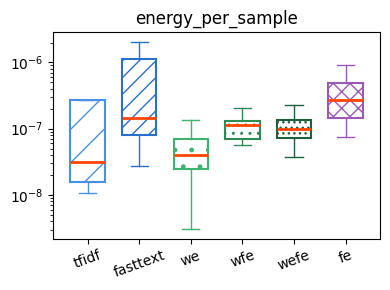

In [259]:
PLOT_TARGET = "energy_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


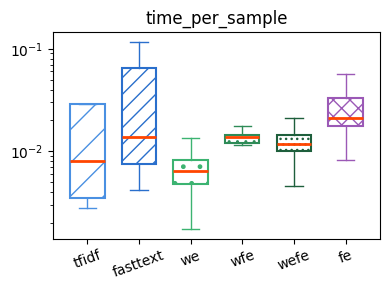

In [260]:
PLOT_TARGET = "time_per_sample"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


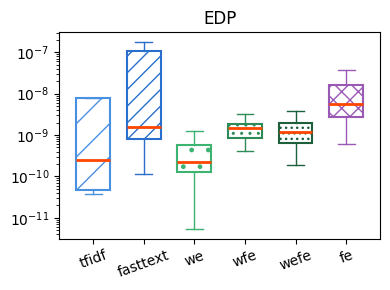

In [261]:
PLOT_TARGET = "EDP"

PLOT_DATA = defaultdict(list)
for feat in FEATURES:
    PLOT_DATA[feat].append(clst_data[clst_data["FeatureType"]==feat][PLOT_TARGET])
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()


##### WFE ABLATION -- FOR SELECTING mmm over mean

In [262]:
tmp_data = clst_data[clst_data.FeatureType == 'wfe']

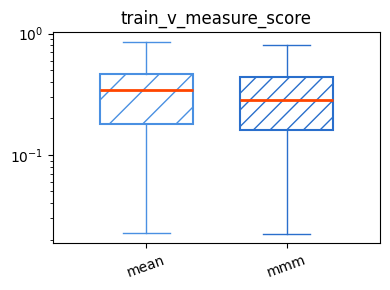

In [263]:
agg_type = ["mean", "mmm"]
PLOT_TARGET = "train_v_measure_score"

PLOT_DATA = defaultdict(list)
for agg in agg_type:
    PLOT_DATA[agg].append(tmp_data[tmp_data["FeatureVariant"]==agg][PLOT_TARGET])
    
data = list(PLOT_DATA.values())
labels = list(PLOT_DATA.keys())

fig, ax = plt.subplots(figsize=(4,3))

# Harmonized, distinct colors per group
colors = [
    '#4A90E2', '#2A6FCC',          # Group 1: shades of blue
    '#3CB371', '#2E8B57', '#1E5F3C',  # Group 2: shades of green
    '#9B59B6'                      # Group 3: purple
]
BOX_WIDTH = 0.02
positions = []

startpos = 0
for i in range(0, len(labels)):
    positions.append(startpos+(i*(BOX_WIDTH+0.01)))
hatches = ['/', '//', '.', '..', '...', 'xx']

median_color = '#FF4500'  # vibrant orange
mean_color='black'
for i, pos in enumerate(positions):    
    arr = data[i]
    box = ax.boxplot(
        arr,
        positions=[positions[i]],
        widths=BOX_WIDTH,
        patch_artist=True,
        showfliers=False,
        # showmeans=True,
        # meanprops=dict(marker='^', markerfacecolor=mean_color, markeredgecolor=mean_color, markersize=9)
    )
    # Style boxes: no fill, only hatch
    for patch in box['boxes']:
        patch.set(facecolor='none', hatch=hatches[i], edgecolor=colors[i], linewidth=1.5)
    for whisker in box['whiskers']:
        whisker.set(color=colors[i], linewidth=1)
    for cap in box['caps']:
        cap.set(color=colors[i], linewidth=1)
    for median in box['medians']:
        median.set(color=median_color, linewidth=2, zorder=5)

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=20)

# Remove extra space on left/right
margin = 0.02
# adjust as needed
ax.set_xlim(positions[0] - margin, positions[-1] + margin)
ax.set_title(PLOT_TARGET)
# Set y-axis to log scale
ax.set_yscale('log')

plt.tight_layout()
plt.show()
